# Libraries:

In [2]:
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import make_grid
from torchvision.utils import save_image
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F

In [4]:
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random

import os
from PIL import Image

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import load_model

from torch_lr_finder import LRFinder

In [5]:
#Some Variables 
minibatch_size = 8
num_classes = 2
num_epochs = 5

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset, and Preprocessing:

In [6]:
image_dataset = ImageFolder(root=r"C:\Users\annotated_dataset")

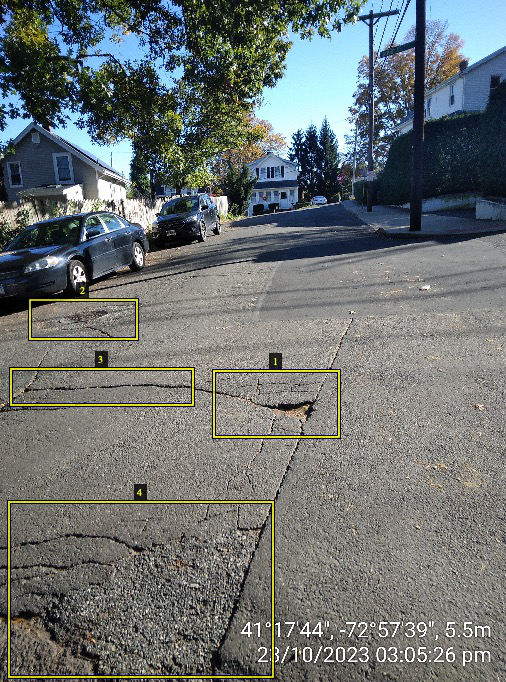

In [7]:
image_dataset[20][0]

In [8]:
#Finding Number of Mini-batches
total_minibatches = int(len(image_dataset)/minibatch_size)
total_minibatches

25

In [9]:
#conversion of images to tensors
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((32,32)),
                                transforms.RandomHorizontalFlip(),
                                transforms.Normalize((0.5, 0.5,0.5), (0.5,0.5,0.5))
                               ])

In [10]:
#Conversion of Image dataset to Tensors
numeric_dataset = ImageFolder(root=r"C:\Users\annotated_dataset",transform=transform)

In [12]:
#image in the form of tensors now
numeric_dataset[20][0]

tensor([[[-0.5233, -0.4005, -0.7602,  ...,  0.2615,  0.2580,  0.2902],
         [-0.7526, -0.3642, -0.1814,  ...,  0.3223,  0.3557,  0.3882],
         [-0.5230, -0.8956, -0.8759,  ...,  0.4325,  0.4473, -0.4454],
         ...,
         [-0.3066, -0.0980, -0.0258,  ...,  0.7075,  0.9070, -0.0463],
         [-0.3178, -0.2839, -0.4768,  ...,  0.0269, -0.2191, -0.0703],
         [-0.3020, -0.1297, -0.8594,  ..., -0.2046, -0.1724, -0.2600]],

        [[-0.3692, -0.3188, -0.6514,  ...,  0.7164,  0.6973,  0.6980],
         [-0.6927, -0.3674, -0.2038,  ...,  0.7877,  0.7891,  0.7836],
         [-0.5418, -0.8485, -0.8222,  ...,  0.8727,  0.8421, -0.2768],
         ...,
         [-0.3095, -0.2091, -0.1279,  ...,  0.6997,  0.9040, -0.0541],
         [-0.3047, -0.3103, -0.5081,  ...,  0.0190, -0.2269, -0.0625],
         [-0.3216, -0.1435, -0.8623,  ..., -0.2281, -0.1959, -0.2745]],

        [[-0.0431, -0.7719, -0.7421,  ...,  1.0000,  0.9865,  1.0000],
         [-0.6615, -0.8682, -0.7493,  ...,  0

In [13]:
#After Resizing the dataset
numeric_dataset[20][0].shape 

torch.Size([3, 32, 32])

In [14]:
#length of whole dataset
len(numeric_dataset)

200

In [15]:
#dividing dataset into 80% training, 10% validation, and 10% test sets
training_set, validation_set, test_set = torch.utils.data.random_split(numeric_dataset, [160, 20, 20])

print(len(training_set)) #size of training set
print(len(validation_set)) #size of validation set
print(len(test_set)) #size of test set

160
20
20


# Data Loaders:

In [19]:
#Initialization of dataloader
train_loader      = DataLoader(training_set  , batch_size = 8 , shuffle = True)
validation_loader = DataLoader(validation_set, batch_size = 2 , shuffle = True)
test_loader       = DataLoader(test_set      , batch_size = 2 , shuffle = True)

# Model:

In [20]:
# Custom Convolutional Neural Network class
class CustomCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d( 3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(32 * 8 * 8, 8)
        self.fc2 = nn.Linear(8, num_classes)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = self.flatten(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Hyper - Paramters Exploration:

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\khalil\anaconda3\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.58E-03


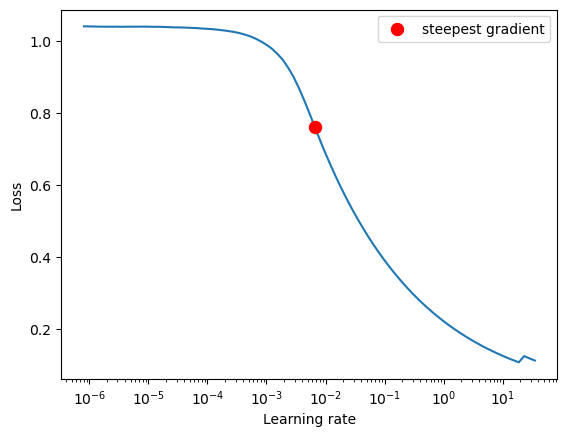

(<Axes: xlabel='Learning rate', ylabel='Loss'>, 0.00657933224657568)

In [21]:
#Model assigning
model = CustomCNN()

# Setting Loss function 
criterion = nn.CrossEntropyLoss()

# Setting optimizer with Initial Parameter values
optimizer = torch.optim.SGD(model.parameters(), lr=1e-7, weight_decay = 0.005, momentum = 0.9)  

# Library used to Find good Learning Rate
lr_finder = LRFinder(model, optimizer, criterion, device="cpu")
lr_finder.range_test(train_loader, end_lr=100, num_iter=100)
lr_finder.plot()  



# Training:

In [27]:
# Choosed learning rate from plot, where the loss decrease
chosen_lr = 0.006579  

# Momentum values to try
momentum_values = [0.1, 0.5, 0.9]

# Training loop for different momentum values
for momentum in momentum_values:
    model = CustomCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=chosen_lr, momentum=momentum)

    num_epochs = 5  

    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Validation loop
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in validation_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f'Momentum: {momentum}, Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Accuracy: {(correct / total) * 100:.2f}%')


Momentum: 0.1, Epoch [1/5], Loss: 0.0001, Validation Accuracy: 100.00%
Momentum: 0.1, Epoch [2/5], Loss: 0.0001, Validation Accuracy: 100.00%
Momentum: 0.1, Epoch [3/5], Loss: 0.0000, Validation Accuracy: 100.00%
Momentum: 0.1, Epoch [4/5], Loss: 0.0000, Validation Accuracy: 100.00%
Momentum: 0.1, Epoch [5/5], Loss: 0.0000, Validation Accuracy: 100.00%
Momentum: 0.5, Epoch [1/5], Loss: 0.0000, Validation Accuracy: 100.00%
Momentum: 0.5, Epoch [2/5], Loss: 0.0000, Validation Accuracy: 100.00%
Momentum: 0.5, Epoch [3/5], Loss: 0.0000, Validation Accuracy: 100.00%
Momentum: 0.5, Epoch [4/5], Loss: 0.0000, Validation Accuracy: 100.00%
Momentum: 0.5, Epoch [5/5], Loss: 0.0000, Validation Accuracy: 100.00%
Momentum: 0.9, Epoch [1/5], Loss: 0.0000, Validation Accuracy: 100.00%
Momentum: 0.9, Epoch [2/5], Loss: 0.0000, Validation Accuracy: 100.00%
Momentum: 0.9, Epoch [3/5], Loss: 0.0000, Validation Accuracy: 100.00%
Momentum: 0.9, Epoch [4/5], Loss: 0.0000, Validation Accuracy: 100.00%
Moment

As Loss = 0, and Accuracy = 100, which significantly means that model Overfit.

# Evaluation:

In [28]:
# Test the model
model.eval()
test_correct = 0
test_total = 0
with torch.no_grad():
    for inputs, labels in test_loader:  #Test set
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        test_total += labels.size(0)
        test_correct += predicted.eq(labels).sum().item()

print(f'Test Accuracy: {(test_correct / test_total) * 100:.2f}%')


Test Accuracy: 100.00%


Accuracy on Test set is also 100%, which means that model predictions are accurate.

# Saving Model:

In [41]:
torch.save(model.state_dict(), r"C:\Users\best.pth")